# PL03. Regresión Lineal Univariante por Derivadas


## Practica realizada por Víctor Vega Sobral
__Borja González Seoane. Aprendizaje Automático. Curso 2024-25__

Objetivos:

1. Implementar un modelo de regresión lineal univariante mediante el método de las derivadas, a partir de las ecuaciones obtenidas en la demostración.
2. Probar el modelo con un conjunto de datos de ejemplo.
3. Comparar los resultados con el regresor lineal de Scikit-Learn, a saber
`skearn.linear model.LinearRegression`.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import random 

In [3]:
# Crear un conjunto de datos

x = np.random.rand(50) * 10
y = np.random.rand(50) * 10

x.sort()
y.sort()

print(x)
print(y)

[0.18434574 0.18796927 0.76850146 1.27981348 1.28498816 1.29715106
 1.3284522  1.88701955 2.11598423 2.402803   2.85368784 2.92798703
 3.03502328 3.20670272 3.25486372 3.57139667 3.72895347 3.85053659
 3.92646731 4.15152648 4.37496151 4.38037649 4.52170118 4.78199421
 5.21963715 5.43656421 5.74640254 5.90537399 5.95323474 6.09909901
 6.25794534 6.30053002 6.59444778 6.82020039 7.10668864 7.26122103
 7.59897815 7.60370223 8.42637756 8.54518166 8.56125423 8.78587434
 9.07898697 9.14653011 9.20247557 9.25554679 9.27526921 9.34187746
 9.90656823 9.93932733]
[0.25026222 0.34890938 0.77767781 0.86295304 0.9791901  1.43527621
 1.57065929 1.64050811 1.77430471 1.91294598 2.02861902 2.15792316
 2.19071622 2.32686662 2.89838509 3.02990484 3.09641677 3.58277731
 3.61910338 3.82562618 3.96747549 3.98357038 4.01800139 4.29344819
 4.4802023  5.28980563 5.49067708 5.7104557  5.80461881 5.99349681
 6.0101409  6.04200728 6.35025086 6.38136334 6.47072255 6.58249818
 6.63553477 6.88399393 7.07128934 7.38

In [4]:
def hallar_beta_0(x, y, beta_1):
    return y.mean()-beta_1 * x.mean()
    

def hallar_beta_1(x,y):
    # Calcular cada término de la fórmula
    numerador = np.sum((x * y) - (y.mean()*x))
    denominador = np.sum((x**2) - (x.mean()*x))
    
    return numerador / denominador


print(hallar_beta_1(x, y))
print(hallar_beta_0(x, y, hallar_beta_1(x,y)))

0.9553960171616012
-0.19805593984121028


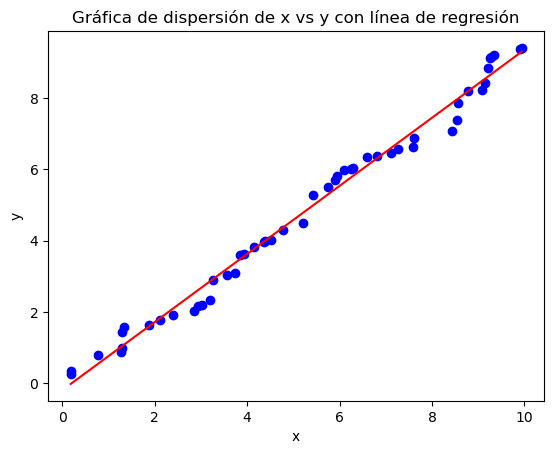

In [5]:
# Gráficos
# Predicción de y
recta_rlu = hallar_beta_1(x,y) * x +hallar_beta_0(x, y, hallar_beta_1(x,y))

# Gráfica de dispersión y línea de regresión en el mismo gráfico
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, recta_rlu, color='red', label='Línea de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfica de dispersión de x vs y con línea de regresión')
plt.show()

# Comparación de datos con el regresor lineal de scikit learn

In [6]:
rlu_scikit = LinearRegression()

rlu_scikit.fit(x.reshape(-1,1),y)
y_pred = rlu_scikit.predict(x.reshape(-1,1))

print(f"Coeficiente (beta1): {rlu_scikit.coef_[0]}")
print(f"Intersección (beta0): {rlu_scikit.intercept_}")

print(f"Predicciones: {y_pred}")

Coeficiente (beta1): 0.9553960171616015
Intersección (beta0): -0.19805593984121206
Predicciones: [-0.02193275 -0.01847085  0.5361673   1.02467276  1.02961663  1.04123702
  1.071142    1.60479503  1.82354696  2.09757248  2.52834606  2.5993312
  2.70159321  2.86561507  2.9116279   3.21404222  3.36457135  3.48073138
  3.55327529  3.76829593  3.98176486  3.98693832  4.12195936  4.37064228
  4.7887646   4.99601586  5.29203416  5.44391485  5.48964082  5.62899896
  5.78076011  5.82144534  6.10225321  6.31793635  6.59164608  6.73928572
  7.06197752  7.06649089  7.85247162  7.96597659  7.98133225  8.19593341
  8.47597205  8.5405025   8.59395257  8.6446566   8.66349932  8.72713658
  9.26663989  9.2979378 ]


## Comparación de ambos regresores

### Gráficamente

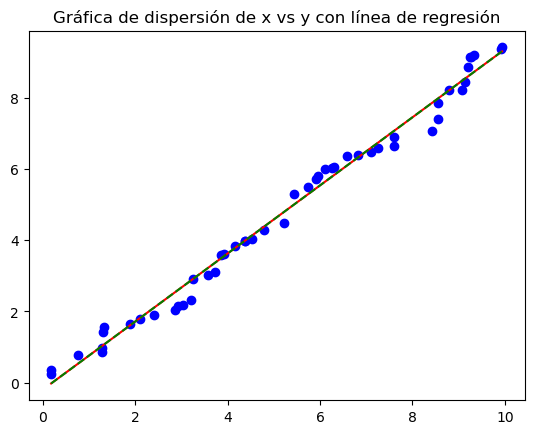

In [7]:
plt.scatter(x, y, color='blue', label='Datos')
plt.plot(x, y_pred, color='red', label='Línea de regresión')
plt.plot(x, recta_rlu, color='green', linestyle = 'dashed')

plt.title('Gráfica de dispersión de x vs y con línea de regresión')
plt.show()

### Numéricamente


In [8]:
print(f"Coeficiente (beta1): {rlu_scikit.coef_[0]:.4f}")
print(f"Intersección (beta0): {rlu_scikit.intercept_:.4f}")

print(f"Predicciones: {y_pred}")
print(f"{hallar_beta_1(x,y):.5}")
print(f"{hallar_beta_0(x, y, hallar_beta_1(x,y)):.4}")

Coeficiente (beta1): 0.9554
Intersección (beta0): -0.1981
Predicciones: [-0.02193275 -0.01847085  0.5361673   1.02467276  1.02961663  1.04123702
  1.071142    1.60479503  1.82354696  2.09757248  2.52834606  2.5993312
  2.70159321  2.86561507  2.9116279   3.21404222  3.36457135  3.48073138
  3.55327529  3.76829593  3.98176486  3.98693832  4.12195936  4.37064228
  4.7887646   4.99601586  5.29203416  5.44391485  5.48964082  5.62899896
  5.78076011  5.82144534  6.10225321  6.31793635  6.59164608  6.73928572
  7.06197752  7.06649089  7.85247162  7.96597659  7.98133225  8.19593341
  8.47597205  8.5405025   8.59395257  8.6446566   8.66349932  8.72713658
  9.26663989  9.2979378 ]
0.9554
-0.1981


# Definición de los métodos en una clase

In [10]:


class RegresionLineal:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.beta_0 = None
        self.beta_1 = None

    def hallar_beta_0(self):
        X_media = np.mean(self.x)
        Y_media = np.mean(self.y)
        self.beta_0 = Y_media - self.beta_1 * X_media
        return self.beta_0

    def hallar_beta_1(self):
        X_media = np.mean(self.x)
        Y_media = np.mean(self.y)
        numerador = np.sum((self.x - X_media) * (self.y - Y_media))
        denominador = np.sum((self.x - X_media) ** 2)
        self.beta_1 = numerador / denominador
        return self.beta_1

    def calcular(self):
        self.hallar_beta_1()
        self.hallar_beta_0()
        return self.beta_1, self.beta_0

# Definir las variables x e y
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Crear una instancia de la clase y calcular beta_1 y beta_0
modelo = RegresionLineal(x, y)
beta_1, beta_0 = modelo.calcular()

print(beta_1)
print(beta_0)

0.6
2.2
